<a href="https://colab.research.google.com/github/ECV21/data-science-portafolio/blob/main/CaseStudy_californiaHousing__LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing data

## Data cleaning and linear regression

Source:https://www.kaggle.com/datasets/harrywang/housing?resource=download

The data is based on California Census in 1990.


This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading California Housing Data


In [4]:
data = pd.read_csv("housing.csv")
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Missing Data Analysis

In [7]:
# Check for missing value
missing_values = data.isnull().sum()
print(missing_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [9]:
# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100
print(missing_percentage)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [14]:
# Remove rows with missing values
data_cleaned = data.dropna()

print(data_cleaned.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


#Data exploration and visualization

In [15]:
#mean, std, min, max of data claned
data_cleaned.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


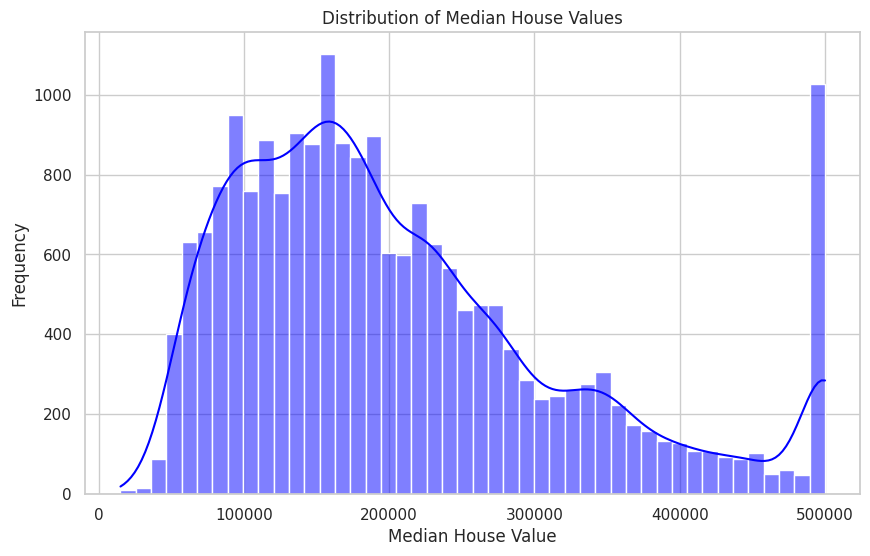

In [16]:
#Distribution of median houses values

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], color='blue', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# outliers

In [17]:
# outliers of "median_house_value"
Q1 = data_cleaned['median_house_value'].quantile(0.25)
print(Q1)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1


# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

119500.0
264700.0
Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


#Correlation heatmap

In [21]:
data_no_outliers_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


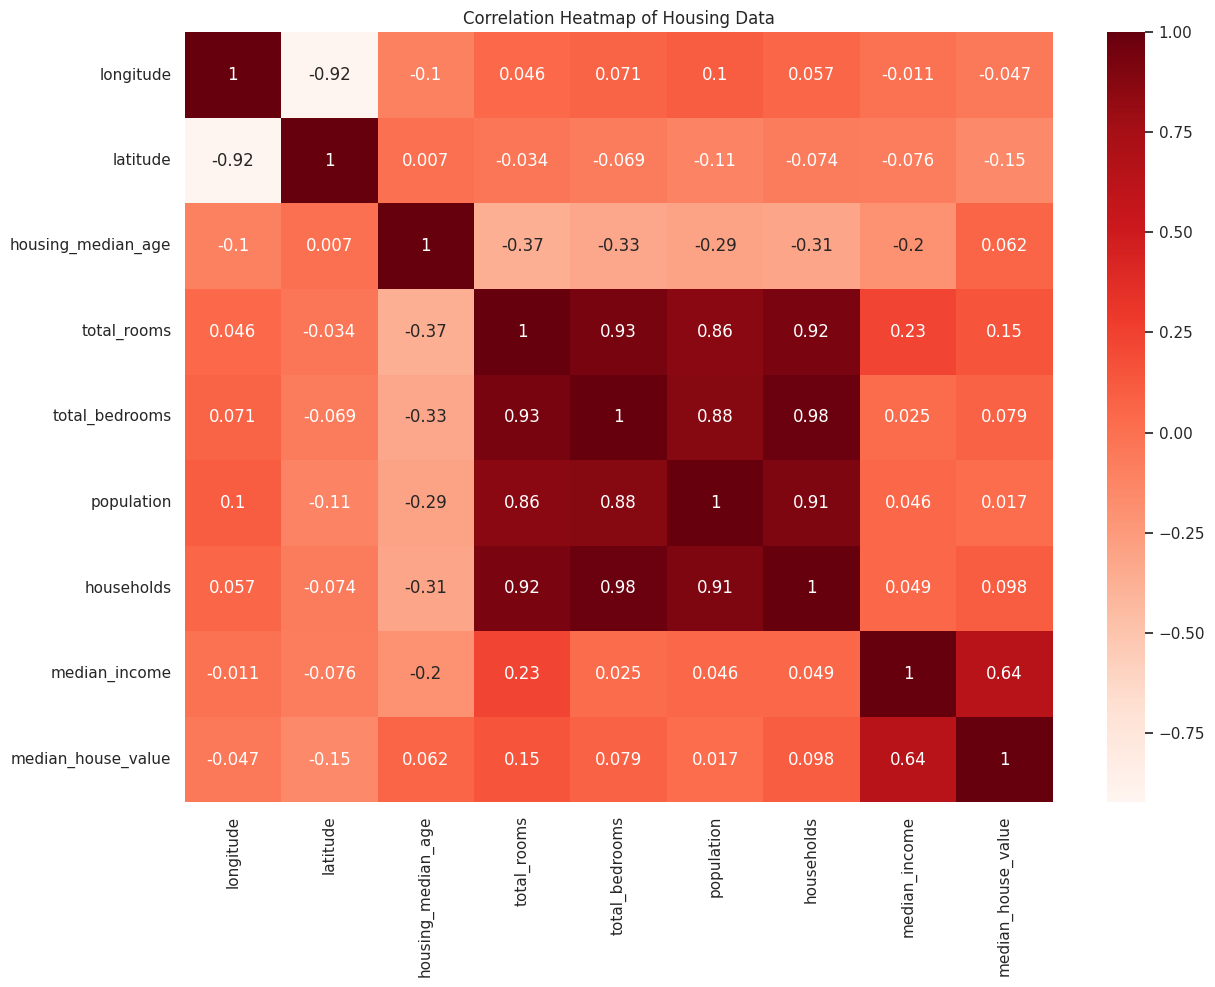

In [26]:
plt.figure(figsize=(14, 10))
sns.heatmap(data_no_outliers_1.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='Reds')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [39]:
# Delete: total_bedrooms

data_fv = data_no_outliers_1.drop("total_bedrooms", axis = 1)
data_fv.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [40]:
# Unique value count for categorical data
for column in ['ocean_proximity']:  # Add other categorical columns if any
    print(f"Unique values in {column}:", data_fv[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


# String data categorization to dummy variables

In [41]:
ocean_proximity_dummies = pd.get_dummies(data_fv['ocean_proximity'], prefix='ocean_proximity', dtype=int)
data_fv = pd.concat([data_fv.drop("ocean_proximity", axis =1), ocean_proximity_dummies], axis=1)


In [42]:
data_fv.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [43]:
data_fv.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [44]:
data_fv = data_fv.drop("ocean_proximity_ISLAND", axis = 1)
data_fv.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [45]:
data_fv.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0


#Splitting the data into Train/Test

In [47]:
# Define independent variables and dependent variable(target)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = data_fv[features]
y = data_fv[target]


# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15495 samples
Test set size: 3874 samples


Training

In [48]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8391,1.0,-118.36,33.98,29.0,2861.0,1715.0,775.0,2.7712,1,0,0,0
16401,1.0,-121.23,37.98,27.0,849.0,373.0,131.0,5.0362,0,1,0,0
20043,1.0,-119.00,36.07,20.0,1042.0,509.0,175.0,2.9815,0,1,0,0
9892,1.0,-122.29,38.29,52.0,3217.0,1670.0,671.0,2.4398,0,0,1,0
8604,1.0,-118.37,33.88,26.0,2620.0,1282.0,525.0,4.4828,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15065,1.0,-116.96,32.80,24.0,2493.0,1420.0,643.0,1.8357,1,0,0,0
9486,1.0,-123.18,39.26,25.0,3066.0,1558.0,535.0,3.7880,1,0,0,0
12371,1.0,-116.42,33.76,14.0,16921.0,2524.0,1262.0,7.6281,0,1,0,0
2845,1.0,-118.96,35.40,28.0,4667.0,2404.0,841.0,3.2325,0,1,0,0


In [49]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2199.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:49:35   Log-Likelihood:            -1.9227e+05
No. Observations:               15495   AIC:                         3.846e+05
Df Residuals:                   15483   BIC:                         3.847e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#Prediction/Testing

In [50]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

13657    145187.470673
18208    244642.130526
20550    109542.486204
14978    192363.337421
14577    225489.860022
             ...      
15777    153944.834131
5479     266004.066647
13878    109027.412134
11390    225063.690594
172      168516.200805
Length: 3874, dtype: float64

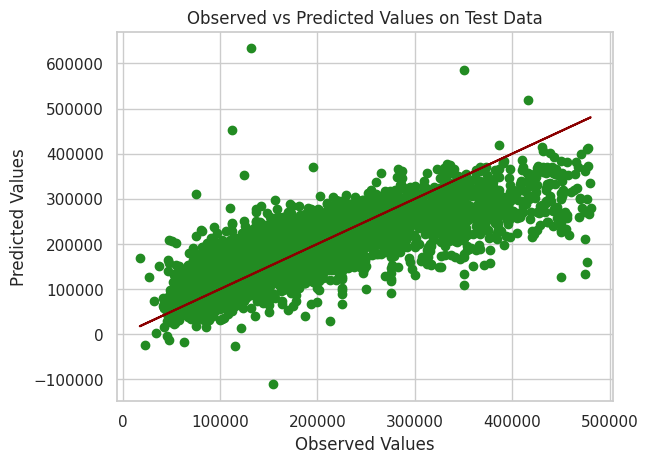

In [51]:
#Assumtion 1: Linearity

# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()


In [52]:
# Assumtion 2: Random sample

mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")


The mean of the residuals is -0.0


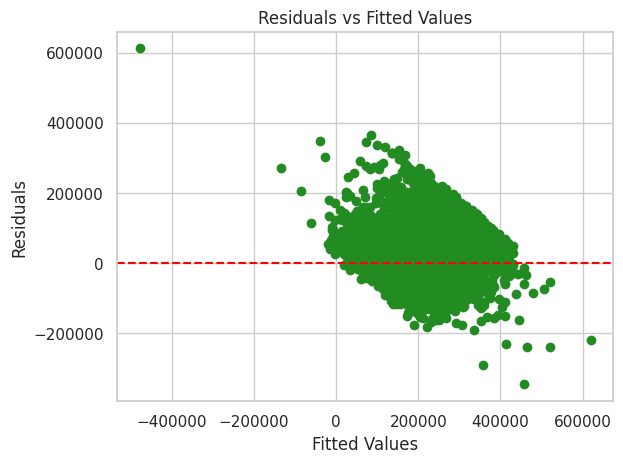

In [53]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend.

In [54]:
# Assumption 3: Exogeneity

residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: -0.0
Correlation between residuals and population: -0.0
Correlation between residuals and households: -0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


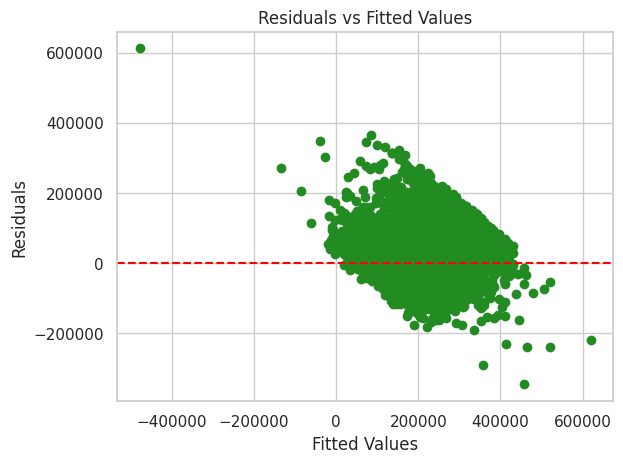

In [55]:
#Assumtion 4: Homoskedasticty


plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Train/test/Evaluation with sklearn

##Scaling the data

In [56]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 59940.79637420412


In [58]:
print(y_pred)
y_test

[[145187.47067329]
 [244642.13052648]
 [109542.48620421]
 ...
 [109027.41213419]
 [225063.69059446]
 [168516.20080526]]


,median_house_value
13657,115700.0
18208,350000.0
20550,103100.0
14978,113800.0
14577,171600.0
...,...
15777,55000.0
5479,326700.0
13878,95600.0
11390,139200.0
